In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [2]:
lincar = envs.LinearCar()

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(lincar, estimator='central_fd', max_it=1000, eps=0.000001,  
                       parameter_domain=np.array([0,1]), rate = 1)
optimizer.estimator.var = 0.5

In [3]:
par, conv = optimizer.optimize(policy)

Start Central Finite Differences optimization:
Initial Parameters: [ 0.75499  0.44662  0.93932]
Run: 0  	Parameter: 	[ 0.75499  0.44662  0.93932]	Reward: -42.4585052908
		Gradient: 	[ 0.36058  2.96525  0.19704]
Run: 100  	Parameter: 	[ 3.03696  2.4565   5.61376]	Reward: -26.2313174006
		Gradient: 	[-0.44987  0.39729  0.31039]
		Average Time: 	0.11s/step
Run: 200  	Parameter: 	[ 3.68372  3.78318  7.1374 ]	Reward: -23.6290140689
		Gradient: 	[ 0.16719 -0.18542  0.39674]
		Average Time: 	0.10s/step
Run: 300  	Parameter: 	[ 3.77107  3.55171  9.79752]	Reward: -17.3797959074
		Gradient: 	[-0.20477  0.15389  0.01889]
		Average Time: 	0.10s/step
Run: 400  	Parameter: 	[  4.04438   4.90261  13.00503]	Reward: -28.7845775321
		Gradient: 	[ 0.32463 -0.81047 -0.00127]
		Average Time: 	0.10s/step
Run: 500  	Parameter: 	[  4.42334   4.15446  11.54958]	Reward: -14.6246148433
		Gradient: 	[ 0.05462 -0.07833  0.05233]
		Average Time: 	0.10s/step
Run: 600  	Parameter: 	[  3.20958   3.38942  12.90849]	Rew

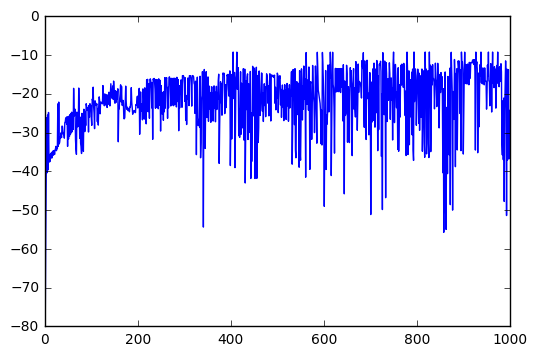

In [4]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[  4.38281   5.35255  15.01926]
Best Reward: 	-9.1720277446


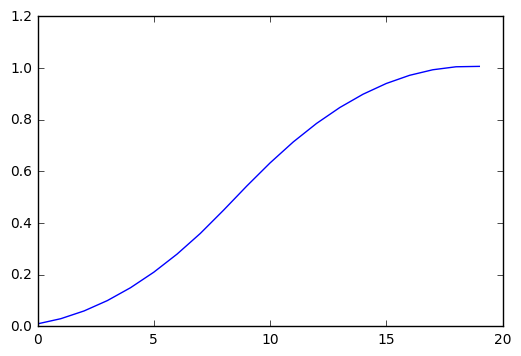

In [5]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace = lincar.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,len(trace))

plt.plot(x,y)
plt.show()

In [6]:
lincar.monitor.update_times[lincar]

[0.00017595291137695312,
 8.606910705566406e-05,
 8.296966552734375e-05,
 8.296966552734375e-05,
 8.20159912109375e-05,
 8.20159912109375e-05,
 8.20159912109375e-05,
 8.20159912109375e-05,
 0.0001010894775390625,
 0.00010204315185546875,
 9.894371032714844e-05,
 8.511543273925781e-05,
 9.894371032714844e-05,
 0.0003008842468261719,
 9.202957153320312e-05,
 0.00011110305786132812,
 8.511543273925781e-05,
 8.416175842285156e-05,
 8.392333984375e-05,
 8.511543273925781e-05,
 8.392333984375e-05,
 8.416175842285156e-05,
 8.296966552734375e-05,
 8.392333984375e-05,
 8.296966552734375e-05,
 8.20159912109375e-05,
 8.296966552734375e-05,
 0.00011396408081054688,
 8.392333984375e-05,
 8.416175842285156e-05,
 8.392333984375e-05,
 8.296966552734375e-05,
 8.296966552734375e-05,
 8.392333984375e-05,
 8.58306884765625e-05,
 8.320808410644531e-05,
 8.296966552734375e-05,
 0.00014519691467285156,
 8.702278137207031e-05,
 8.487701416015625e-05,
 8.416175842285156e-05,
 8.511543273925781e-05,
 8.39233398

In [7]:
policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

#policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(lincar, estimator='forward_fd', max_it=1000, eps=0.0001,  
                       parameter_domain=np.array([-1,1]), rate = 0.2)
optimizer.estimator.var = 0.5

In [8]:
par, conv = optimizer.optimize(policy)

KeyboardInterrupt: 

In [ ]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter: [  5.54976  -6.31094 -10.8346 ]
Best Reward: -27.5753021636


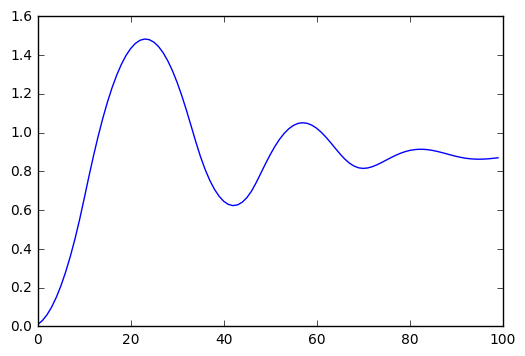

In [8]:
print("Best Parameter: "+str(optimizer.best_parameter))
print("Best Reward: "+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace = lincar.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()